In [8]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\code\\nina\\stepik\\graphviz-2.38\\bin'

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
data

X_1  X_2  Y
0    1    0  1
1    1    0  1
2    1    0  1
3    0    1  1
4    0    0  0
5    0    0  0
6    0    0  0
7    1    1  0

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
X = data[['X_1', 'X_2']]
y = data.Y

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [152]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [153]:
from IPython.display import HTML
style = "<style>svg{widht:70% !important;height:70% !important;}</style>"
HTML(style)

In [166]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))

#display(SVG(graph.pipe(format='svg')))

In [155]:
titanic_data = pd.read_csv('./titanic/train.csv')

In [156]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [157]:
X = titanic_data.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_data.Survived

In [158]:
X = pd.get_dummies(X)

In [159]:
X = X.fillna({'Age': X.Age.median()})

In [160]:
X.head()


Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [161]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [162]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [165]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled=True))

#display(SVG(graph.pipe(format='svg')))

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
clf.score(X_train, y_train)

0.9798657718120806

In [90]:
clf.score(X_test, y_test)

0.7661016949152543

In [91]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [92]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
clf.score(X_train, y_train)

0.8406040268456376

In [94]:
clf.score(X_test, y_test)

0.8101694915254237

In [98]:
max_depth_values = range(1, 100)

In [122]:
scores_data = pd.DataFrame()

In [105]:
from sklearn.model_selection import cross_val_score

In [123]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [124]:
scores_data

max_depth  train_score  test_score  cross_val_score
0           1     0.781879    0.796610         0.781857
0           2     0.805369    0.776271         0.768553
0           3     0.823826    0.820339         0.788678
0           4     0.833893    0.823729         0.783580
0           5     0.840604    0.810169         0.803664
..        ...          ...         ...              ...
0          95     0.979866    0.766102         0.778509
0          96     0.979866    0.783051         0.776871
0          97     0.979866    0.779661         0.773467
0          98     0.979866    0.776271         0.771772
0          99     0.979866    0.772881         0.775176

[99 rows x 4 columns]

In [125]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type',
                           value_name='score')

In [126]:
scores_data_long.head()

max_depth     set_type     score
0          1  train_score  0.781879
1          2  train_score  0.805369
2          3  train_score  0.823826
3          4  train_score  0.833893
4          5  train_score  0.840604

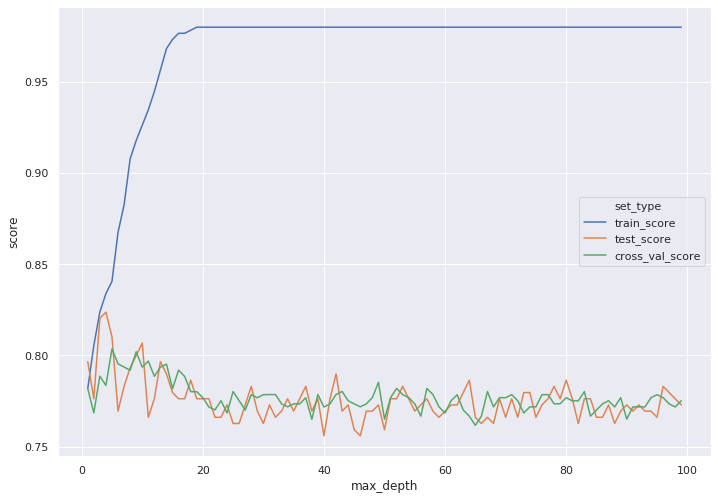

In [127]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [128]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [129]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7898305084745763

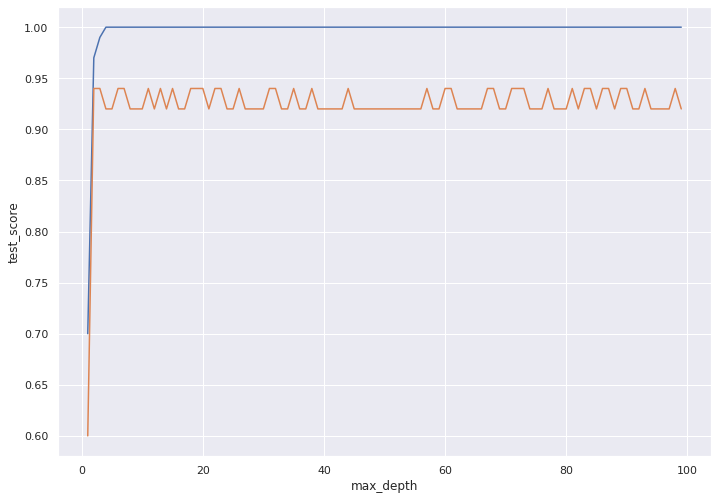

In [39]:
#ирисы
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

train_iris = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
test_iris = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)

X_train = train_iris.drop('species', axis=1)
y_train = train_iris['species']

X_test = test_iris.drop('species', axis=1)
y_test = test_iris['species']

score_data = pd.DataFrame(columns=['max_depth', 'train_score', 'test_score'])
rs=np.random.seed(0)

for max_depth in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    score_data.loc[max_depth] = [max_depth, train_score, test_score]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=score_data, x='max_depth', y='train_score')
sns.lineplot(data=score_data, x='max_depth', y='test_score')

In [54]:
# Считать данные для обучения Дерева
dogs_n_cats = pd.read_csv('cats.csv')
X_train = dogs_n_cats.drop('Вид', axis=1)
y_train = dogs_n_cats['Вид']


In [59]:
dogs_n_cats

Unnamed: 0  Шерстист  Гавкает  Лазает по деревьям      Вид
0           0         1        1                   0  собачка
1           1         1        1                   0  собачка
2           2         1        1                   0  собачка
3           3         1        1                   0  собачка
4           4         1        0                   1    котик
5           5         1        0                   1    котик
6           6         1        0                   1    котик
7           7         1        0                   1    котик
8           8         1        1                   1    котик
9           9         0        0                   1    котик

In [55]:
# Обучение Дерева
rs = np.random.seed(0)
clf = DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
# Результат обучения
clf.score(X_train, y_train)

1.0

In [67]:
# Считать тестовые данные
X_test = pd.read_json('dataset_209691_15.txt')

In [69]:
X_test = X_test.drop(["Длина", "Высота"], axis=1)

In [72]:
X_test.insert(loc=0, column='Unnamed: 0', value=X_test.index)

In [73]:
X_test

Unnamed: 0  Шерстист  Гавкает  Лазает по деревьям
0            0         1        1                   0
1            1         1        1                   0
2            2         1        1                   0
3            3         1        1                   0
4            4         1        1                   0
..         ...       ...      ...                 ...
95          95         1        0                   1
96          96         1        0                   1
97          97         1        0                   1
98          98         1        0                   1
99          99         1        0                   1

[100 rows x 4 columns]

In [74]:
# Предсказать результаты
y_pred = clf.predict(X_test)

In [75]:
# Подсчитать количество собачек
pd.Series(y_pred)[y_pred == 'собачка'].count()

53

In [121]:
true_pos = 15
false_pos = 15
true_neg = 40
false_neg = 30

prec = true_pos / (true_pos + false_pos)
rec = true_pos / (true_pos + false_neg)
f = 2 * (prec * rec) / (prec + rec)
print(prec)
print(rec)
print(f)


0.5
0.3333333333333333
0.4


In [119]:
TP = 15
FN = 30
FP = 15

precision = TP / (TP + FP)

recall = TP / (TP + FN)

f1_score = precision * recall * 2 / (precision + recall)
print(precision)
print(recall)
print(f1_score)

0.5
0.3333333333333333
0.4


In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [132]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [133]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [134]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [135]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [136]:
best_clf = grid_search_cv_clf.best_estimator_

In [137]:
best_clf.score(X_test, y_test)

0.8

In [138]:
from sklearn.metrics import precision_score, recall_score

In [139]:
y_pred = best_clf.predict(X_test)

In [140]:
precision_score(y_test, y_pred)

0.8144329896907216

In [141]:
recall_score(y_test, y_pred)

0.6583333333333333

In [142]:
y_predicted_prob = best_clf.predict_proba(X_test)

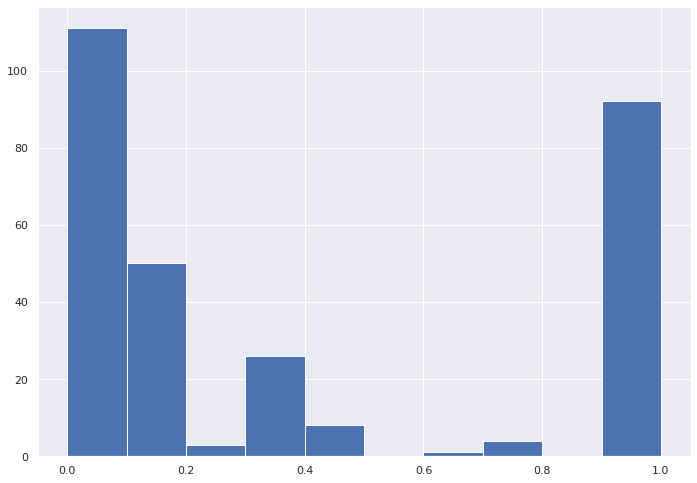

In [143]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [144]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [145]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.44444444, 0.25      , 0.06086957, 1.        , 0.        ,
       0.75      , 0.12      , 0.13333333, 0.33333333, 0.36842105,
       0.18181818, 0.66666667])

In [146]:
precision_score(y_test, y_pred)

0.8260869565217391

In [147]:
recall_score(y_test, y_pred)

0.6333333333333333

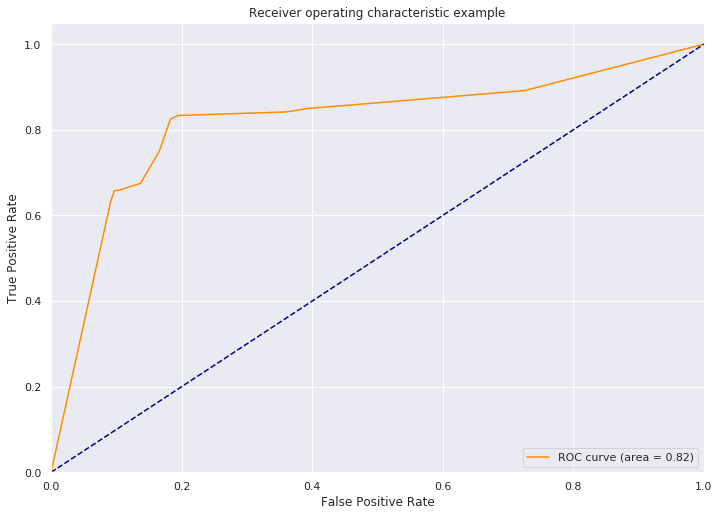

In [148]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()